## **path to data**

In [1]:
path_reg = r'D:\uni\2-Msc\term 2\deep learning\homeworks\LSTM\ECG Datasets.xlsx'
path_reg2 = r'D:\uni\2-Msc\term 2\deep learning\homeworks\Temperature Dataset.xlsx'

## **necessarry modules**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-dark')
from IPython.display import clear_output
import pandas as pd
from math import *
from sklearn.model_selection import train_test_split

## **time series**

In [3]:
def time_series_create(data_column, n_feature):
    data_column = np.ravel(data_column)
    num_rows = np.size(data_column, axis=0)
    seriesed_data = np.zeros((num_rows - n_feature + 1, n_feature))
    for i in range(n_feature):
        seriesed_data[:, i] = data_column[i:num_rows - n_feature + i + 1]
    return seriesed_data

## **activation functions**

In [4]:
def sigmoid(net) :
  return 1 / (1 + np.exp(-net))

def tanh(net) :
   return np.tanh(net)

## **activation functions derivative**

In [5]:
def sigmoid_derivative(net) :
  return sigmoid(net) * (1 - sigmoid(net))

def tanh_derivative(net) :
  return 1 - np.tanh(net) ** 2

## **normalize data**

In [6]:
def normalizeData_0TO1(data, return_param=False) :
  min_vals = np.min(data, axis=0)
  max_vals = np.max(data, axis=0)
  normal_data = (data - min_vals) / (max_vals - min_vals)
  if return_param :
   return normal_data, min_vals, max_vals
  else :
    return normal_data

def normalizeData_neg1TOpos1(data, return_param=False) :
  min_vals = np.min(data, axis=0)
  max_vals = np.max(data, axis=0)
  normal_data = 2 * (data - min_vals) / (max_vals - min_vals) - 1
  if return_param :
   return normal_data, min_vals, max_vals
  else :
    return normal_data

## **functions for MSE**

In [7]:
def MSE_calculate(targets, results, one_mse=True, max_mse=False) :
    square_error = (targets - results) ** 2
    if not max_mse :
     mse = np.ravel(np.mean(square_error, axis=0))
    else :
      mse = np.ravel(np.max(square_error, axis=0))
    if one_mse :
       mse = float(np.mean(mse))
    return mse

def update_plot_MSE(mse_train, mse_test, ite=0, epoch=0, figsize=(6, 4), one_mse=True, **kwargs):
   mse_test = np.array(mse_test, dtype='float32')
   mse_train = np.array(mse_train, dtype='float32')
   x, y = figsize
   fig, axes = plt.subplots(1, 2, figsize=(x, y))
   fig.suptitle('MSE plot')
   if one_mse:
        axes[1].semilogy(np.arange(1, ite+1), mse_test, label='MSE test', color='orange')
        axes[0].semilogy(np.arange(1, ite+1), mse_train, label='MSE train', color='blue')
        axes[0].legend()
        axes[1].legend()
   elif np.ndim(mse_test) > 1:
        k = 0
        for i in mse_test.swapaxes(1,0) :
            k += 1
            axes[1].semilogy(np.arange(1, ite+1), i, label=f'output {k} MSE test')
            axes[1].legend(fontsize='small')
        k = 0
        for i in mse_train.swapaxes(1,0) :
            k += 1
            axes[0].semilogy(np.arange(1, ite+1), i, label=f'output {k} MSE train')
            axes[0].legend(fontsize='small')
   try :
     axes[0].set_title(f'train MSE, last mse : {np.mean(mse_train[-1]):.5f}')
     axes[1].set_title(f'test MSE, last mse : {np.mean(mse_test[-1]):.5f}')
   except :
       pass
   for ax in axes :
     ax.minorticks_on()
     ax.grid(which='minor', linestyle='-', linewidth='0.5', color='gray', axis='y')
     ax.tick_params(axis='y', which='minor', labelsize=8)
     ax.tick_params(axis='y', which='major', labelsize=10)
     ax.set_xlabel(f'epochs ({ite}/{epoch})')
     ax.set_ylabel('loss')

   fig.tight_layout()
   plt.show()


def double_data_MSE_plot(target_train, output_train, target_test, output_test, mse_train, mse_test, ite, epoch, figsize=(6, 4)):
    x, y = figsize
    fig, axes = plt.subplots(2, 2, figsize=(x, y))  # 2x2 grid for subplots
    fig.suptitle('MSE and Data Plot')
    # Top-left: Train MSE
    axes[0, 0].semilogy(np.arange(1, ite + 1), mse_train, label='MSE train', color='blue')
    axes[0, 0].legend(fontsize='small')
    axes[0, 0].set_title(f'Train MSE: {np.mean(mse_train[-1]):.5f}')
    axes[0, 0].set_xlabel(f'Epoch {ite}/{epoch}')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].tick_params(axis='x', labelsize=10)  # Show x-axis ticks with labels
    axes[0, 0].grid(which='minor', linestyle='-', linewidth='0.5', color='gray')
    # Top-right: Test MSE
    axes[0, 1].semilogy(np.arange(1, ite + 1), mse_test, label='MSE test', color='orange')
    axes[0, 1].legend(fontsize='small')
    axes[0, 1].set_title(f'Test MSE: {np.mean(mse_test[-1]):.5f}')
    axes[0, 1].set_xlabel(f'Epoch {ite}/{epoch}')
    axes[0, 1].tick_params(axis='x', labelsize=10)  # Show x-axis ticks with labels
    axes[0, 1].grid(which='minor', linestyle='-', linewidth='0.5', color='gray')
    # Bottom-left: Train Data
    axes[1, 0].plot(target_train, color='blue', label='Actual data')
    axes[1, 0].plot(output_train, color='red', label='Predicted data', linestyle='dotted')
    axes[1, 0].legend(fontsize='small')
    axes[1, 0].set_title('Train Data')
    axes[1, 0].minorticks_on()
    axes[1, 0].grid(which='minor', linestyle='-', linewidth='0.5', color='gray')
    axes[1, 0].tick_params(axis='x', labelbottom=False)  # Hide x-axis ticks and labels
    # Bottom-right: Test Data
    axes[1, 1].plot(target_test, color='blue', label='Actual data')
    axes[1, 1].plot(output_test, color='red', label='Predicted data', linestyle='dotted')
    axes[1, 1].legend(fontsize='small')
    axes[1, 1].set_title('Test Data')
    axes[1, 1].minorticks_on()
    axes[1, 1].grid(which='minor', linestyle='-', linewidth='0.5', color='gray')
    axes[1, 1].tick_params(axis='x', labelbottom=False)  # Hide x-axis ticks and labels
    # Adjust layout
    fig.tight_layout()
    plt.show()


## **regression plot**

In [8]:
def plot_regression(target_train, predict_train, target_test, predict_test, figsize=(8, 6), target_full=None, predict_full=None):
    # Determine if the data is in the range [0, 1]
    is0to1 = np.sum(np.where(target_train < -0.01, 1, 0)) == 0

    # Create a 1x2 grid for training and testing regression plots
    fig, axes = plt.subplots(1, 2, figsize=figsize)  # 1 row, 2 columns
    fig.suptitle('Regression Plot')

    n_output = np.size(target_train, axis=1)

    # Plot for training data (left subplot)
    for i in range(n_output):
        slope_train, intercept_train = np.polyfit(target_train[:, i], predict_train[:, i], deg=1)
        axes[0].scatter(target_train[:, i], predict_train[:, i], edgecolor='blue', alpha=0.7, facecolor='none', label=f'Scattered Data Output {i + 1}')
        
        # Red line (Y=X)
        if is0to1:
            axes[0].plot([0, 1], [0, 1], color='red', label='Y=X Line')  # Red line from [0, 1]
            axes[0].plot([0, 1], [intercept_train, intercept_train + slope_train], color='black', linestyle='dotted', label='Regression Line')
        else:
            axes[0].plot([-1, 1], [-1, 1], color='red', label='Y=X Line')  # Red line from [-1, 1]
            axes[0].plot([-1, 1], [intercept_train - slope_train, intercept_train + slope_train], color='black', linestyle='dotted', label='Regression Line')

        axes[0].set_title(f'Train Output {i + 1}: Reg. Coeff = {round(slope_train, 4)}', fontsize='small')
        axes[0].set_xlabel('Expected Values')
        axes[0].set_ylabel('Predicted Values')
        axes[0].legend(fontsize='x-small')

        # Show minor grids
        axes[0].minorticks_on()
        axes[0].grid(which='minor', linestyle='-', linewidth='0.5', color='gray', axis='both', alpha=0.5)

    # Plot for test data (right subplot)
    for i in range(n_output):
        slope_test, intercept_test = np.polyfit(target_test[:, i], predict_test[:, i], deg=1)
        axes[1].scatter(target_test[:, i], predict_test[:, i], edgecolor='orange', alpha=0.7, facecolor='none', label=f'Scattered Test Data {i + 1}')
        
        if is0to1:
            axes[1].plot([0, 1], [0, 1], color='red', label='Y=X Line')  # Red line from [0, 1]
            axes[1].plot([0, 1], [intercept_test, intercept_test + slope_test], color='black', linestyle='dotted', label='Regression Line')
        else:
            axes[1].plot([-1, 1], [-1, 1], color='red', label='Y=X Line')  # Red line from [-1, 1]
            axes[1].plot([-1, 1], [intercept_test - slope_test, intercept_test + slope_test], color='black', linestyle='dotted', label='Regression Line')

        axes[1].set_title(f'Test Output {i + 1}: Reg. Coeff = {round(slope_test, 4)}', fontsize='small')
        axes[1].set_xlabel('Expected Values')
        axes[1].set_ylabel('Predicted Values')
        axes[1].legend(fontsize='x-small')

        # Show minor grids
        axes[1].minorticks_on()
        axes[1].grid(which='minor', linestyle='-', linewidth='0.5', color='gray', axis='both', alpha=0.5)

    fig.tight_layout()
    plt.show()

    # If full data is provided, plot it in a separate figure
    if target_full is not None and predict_full is not None:
        fig_full, ax_full = plt.subplots(1, 1, figsize=figsize)
        slope_full, intercept_full = np.polyfit(target_full[:, 0], predict_full[:, 0], deg=1)
        ax_full.scatter(target_full[:, 0], predict_full[:, 0], edgecolor='purple', alpha=0.7, facecolor='none', label='Full Data')
        
        if is0to1:
            ax_full.plot([0, 1], [intercept_full, intercept_full + slope_full], color='black', linestyle='dotted', label='Regression Line')  # Regression line label
            ax_full.plot([0, 1], [0, 1], color='red', label='Y=X Line')  # Y=X line label
        else:
            ax_full.plot([-1, 1], [-1, 1], color='red', label='Y=X Line')  # Y=X line label
            ax_full.plot([-1, 1], [intercept_full - slope_full, intercept_full + slope_full], color='black', linestyle='dotted', label='Regression Line')

        ax_full.set_title(f'Full Data: Reg. Coeff = {round(slope_full, 4)}', fontsize='small')
        ax_full.set_xlabel('Expected Values')
        ax_full.set_ylabel('Predicted Values')
        ax_full.legend(fontsize='x-small')

        # Show minor grids for full data plot
        ax_full.minorticks_on()
        ax_full.grid(which='minor', linestyle='-', linewidth='0.5', color='gray', axis='both', alpha=0.5)

        fig_full.tight_layout()
        plt.show()

## **plot whole data**

In [9]:
def plot_outputs(target, output, figsize=(8,6)) :
    x, y = figsize
    k = 0
    for i, j in zip(target.swapaxes(1, 0), output.swapaxes(1, 0)) :
     k += 1
     fig = plt.figure(figsize=(x, y))
     plt.clf()
     plt.plot(i, color='blue', label='actual data')
     plt.plot(j, color='red', label='predicted data', linestyle='dotted')
     plt.minorticks_on()
     plt.grid(which='minor', linestyle='-', linewidth='0.5', color='gray')
     plt.tick_params(axis='y', which='minor', labelsize=8)
     plt.tick_params(axis='y', which='major', labelsize=10)
     plt.tick_params(labelbottom=False)
     plt.legend(fontsize='small')
     title = f'curve fitting for output {k}'
     plt.title(title)
     print('')
     plt.show()

## **weight initialize**

In [10]:
def weight_init(input_size, hidden_size, output_size, var, seed=None) :
    np.random.seed(seed)
    Wf = np.random.normal(0, var, (hidden_size, input_size+output_size))
    Wi1 = np.random.normal(0, var, (hidden_size, input_size+output_size))
    Wi2 = np.random.normal(0, var, (hidden_size, input_size+output_size))
    Wo2 = np.random.normal(0, var, (output_size, hidden_size))
    Wo1 = np.random.normal(0, var, (output_size, input_size+output_size))
    weights = {'Wf': Wf, 'Wi1': Wi1, 'Wi2': Wi2, 'Wo1': Wo1, 'Wo2': Wo2}
    return weights

def bias_init(hidden_size, output_size) :
    Bf = np.zeros(hidden_size)
    Bi1 = np.zeros(hidden_size)
    Bi2 = np.zeros(hidden_size)
    Bo1 = np.zeros(output_size)
    Bo2 = np.zeros(output_size)
    biases = {'Bf': Bf, 'Bi1':Bi1, 'Bi2': Bi2, 'Bo1': Bo1, 'Bo2':Bo2}
    return biases

def last_state_init(hidden_size, output_size) :
    per_c = np.zeros(hidden_size)
    per_h = np.zeros(output_size)
    pervious = {'C': per_c, 'H': per_h}
    return pervious

def output_init(hidden_size, output_size) :
    Of = np.zeros(hidden_size)
    Oi1 = Of.copy()
    Oi2 = Of.copy()
    Oi = Of.copy()
    Cc = Of.copy()
    Oo1 = np.zeros(output_size)
    Oo2 = Oo1.copy()
    Hh = Oo1.copy()
    outputs = {'Of': Of, 'Oi1': Oi1, 'Oi2': Oi2,\
               'Oo1': Oo1, 'Oo2': Oo2, 'Oi': Oi,\
               'C': Cc, 'H': Hh}
    return outputs

def net_init(hidden_size, output_size) :
    net_f = np.zeros(hidden_size)
    net_i1 = net_f.copy()
    net_i2 = net_f.copy()
    net_o1 = np.zeros(output_size)
    net_o2 = net_o1.copy()
    nets = {'net_f': net_f, 'net_i1': net_i1,\
            'net_i2': net_i2, 'net_o1': net_o1,\
            'net_o2': net_o2}
    return nets

## **batch separation**

In [11]:
def batch_sep(datas, method, batch_size) :
    #train_data, train_tar, test_data, test_tar = datas
    if method == 'SGD' :

          number_of_rows = datas[0].shape[0]
          number_of_rows2 = datas[2].shape[0]
          random_indices = np.random.choice(number_of_rows, size=batch_size, replace=False)
          random_indices2 = np.random.choice(number_of_rows2, size=batch_size, replace=False)
          train_data_batch = datas[0][random_indices]
          train_tar_batch = datas[1][random_indices]
          test_data_batch = datas[2][random_indices2]
          test_tar_batch = datas[3][random_indices2]
          out = [train_data_batch, train_tar_batch, test_data_batch, test_tar_batch]

    elif batch_size is not None :

          length1 = np.size(datas[0], axis=0)
          length2 = np.size(datas[2], axis=0)
          ind1 = np.random.randint(0, length1-batch_size+1, 1)[0]
          ind2 = np.random.randint(0, length2-batch_size+1, 1)[0]
          train_data_batch = datas[0][ind1:ind1+batch_size]
          train_tar_batch = datas[1][ind1:ind1+batch_size]
          test_data_batch = datas[2][ind2:ind2+batch_size]
          test_tar_batch = datas[3][ind2:ind2+batch_size]
          out = [train_data_batch, train_tar_batch, test_data_batch, test_tar_batch]

    else :
       out = datas

    return  out.copy()

## **LSTM class**

In [12]:
class LSTM_unit :
    def __init__(self, input_size, hidden_size, output_size, bias=True, seed=None) :
        var = np.sqrt(2 / (input_size + output_size))
        self.input_size, self.hidden_size, self.output_size, self.is_biased = input_size, hidden_size, output_size, bias
        self.Weights = weight_init(input_size, hidden_size, output_size, var, seed=seed)
        self.biases = bias_init(hidden_size, output_size)
        self.pervious = last_state_init(hidden_size, output_size)
        self.outputs = output_init(hidden_size, output_size)
        self.nets = net_init(hidden_size, output_size)

    def reset_memory(self) :
       self.outputs['H'] = np.zeros(self.output_size)
       self.pervious['H'] = np.zeros(self.output_size)
       self.outputs['C'] = np.zeros(self.hidden_size)
       self.pervious['C'] = np.zeros(self.hidden_size)

    def __call__(self, input_vector) :
        per_h = self.outputs['H']
        x_h_cat = np.hstack((per_h, input_vector.ravel())).reshape(-1, 1)
        self.nets['net_f'] = np.ravel(self.Weights['Wf'] @ x_h_cat)
        self.nets['net_i1'] = np.ravel(self.Weights['Wi1'] @ x_h_cat)
        self.nets['net_i2'] = np.ravel(self.Weights['Wi2'] @ x_h_cat)
        self.nets['net_o1'] = np.ravel(self.Weights['Wo1'] @ x_h_cat)
        if self.is_biased :
            self.nets['net_f'] += self.biases['Bf']
            self.nets['net_i1'] += self.biases['Bi1']
            self.nets['net_i2'] += self.biases['Bi2']
            self.nets['net_o1'] += self.biases['Bo1']
        self.outputs['Of'] = sigmoid(self.nets['net_f'])
        self.outputs['Oi1'] = sigmoid(self.nets['net_i1'])
        self.outputs['Oi2'] = tanh(self.nets['net_i2'])
        self.outputs['Oo1'] = sigmoid(self.nets['net_o1'])
        per_c = self.outputs['C']
        C_tilda = per_c * self.outputs['Of']
        self.outputs['Oi'] = self.outputs['Oi1'] * self.outputs['Oi2']
        self.pervious['C'] = self.outputs['C'].copy()
        self.outputs['C'] = self.outputs['Oi'] + C_tilda
        self.nets['net_o2'] = np.ravel(self.Weights['Wo2'] @ self.outputs['C'].reshape(-1, 1))
        if self.is_biased :
            self.nets['net_o2'] += self.biases['Bo2']
        self.outputs['Oo2'] = tanh(self.nets['net_o2'])
        self.pervious['H'] = self.outputs['H'].copy()
        self.outputs['H'] = self.outputs['Oo2'] * self.outputs['Oo1']
        return self.outputs['H'].ravel()
    
    def forward(self, input_vector) :
        return self(input_vector)
    
    def backward(self, input, traget, learning_rate, bias_learning_rate) :
         out = self.forward(input)
         errorr = np.ravel(traget) - out
         x_h_cat = np.hstack((self.pervious['H'], input.ravel()))
         sensi_o1 = -errorr * self.outputs['Oo2'] * sigmoid_derivative(self.nets['net_o1'])
         sensi_o2 = -errorr * self.outputs['Oo1'] * tanh_derivative(self.nets['net_o2'])
         errorr_if = np.ravel(self.Weights['Wo2'].T @ sensi_o2.reshape((-1, 1)))
         sensi_i1 = errorr_if * self.outputs['Oi2'] * sigmoid_derivative(self.nets['net_i1'])
         sensi_i2 = errorr_if * self.outputs['Oi1'] * tanh_derivative(self.nets['net_i2'])
         sensi_f = errorr_if * self.pervious['C'] * sigmoid_derivative(self.nets['net_f'])
         grad_Wo1 = np.outer(sensi_o1, x_h_cat)
         grad_Wo2 = np.outer(sensi_o2, self.outputs['C'])        
         grad_Wi1 = np.outer(sensi_i1, x_h_cat)
         grad_Wi2 = np.outer(sensi_i2, x_h_cat)
         grad_Wf = np.outer(sensi_f, x_h_cat)
         self.Weights['Wo1'] -= learning_rate * grad_Wo1
         self.Weights['Wo2'] -= learning_rate * grad_Wo2
         self.Weights['Wi1'] -= learning_rate * grad_Wi1
         self.Weights['Wi2'] -= learning_rate * grad_Wi2
         self.Weights['Wf'] -= learning_rate * grad_Wf
         if self.is_biased :
             self.biases['Bo1'] -= bias_learning_rate * sensi_o1
             self.biases['Bo2'] -= bias_learning_rate * sensi_o2
             self.biases['Bi1'] -= bias_learning_rate * sensi_i1
             self.biases['Bi2'] -= bias_learning_rate * sensi_i2
             self.biases['Bf'] -= bias_learning_rate * sensi_f

     # this method will do all train chalenges for you, just easily pass data to it
    def train(self, datas, epochs=10, **kwargs) :
      loss_both = kwargs.get('history', [[],[]])
      method = kwargs.get('method', 'GD')
      shuffle = kwargs.get('shuffle_data', True)
      batch_size = kwargs.get('batch_size', None)
      if method == 'SGD' :
        batch_size = kwargs.get('batch_size', 1)
      input_variance = kwargs.get('input_variance', 0)
      max_mse = kwargs.get('max_mse', False)
      learning_rate = kwargs.get('learning_rate ', 1e-3)
      bias_learning_rate = kwargs.get('bias_learning_rate', learning_rate)
      output_variance = kwargs.get('output_variance', 0)
      plot_data = kwargs.get('plot_data', False)
      one_mse = kwargs.get('one_mse', True)
      figsize = kwargs.get('fig_size', (10, 5))
      loss_train, loss_test = loss_both
      last_i = np.size(loss_train, axis=0)

      for i in range(epochs) :
       train_data_batch, train_tar_batch, test_data_batch, test_tar_batch = batch_sep(datas, method, batch_size)
       noisy_train_data = train_data_batch + np.random.normal(0, input_variance, train_data_batch.shape)
       noisy_tar_data = train_tar_batch + np.random.normal(0, output_variance, train_tar_batch.shape)
       if shuffle == True :
          leng = np.size(noisy_tar_data, axis=0)
          random_indices = np.random.permutation(leng)
          noisy_tar_data = noisy_tar_data[random_indices]
          noisy_train_data = noisy_train_data[random_indices]
       for input, target in zip(noisy_train_data, noisy_tar_data) :
         self.backward(input, target, learning_rate, bias_learning_rate)
       # please, please note that train method will do a feedforward itself

       train_OUT_batch = np.reshape([self(train) for train in train_data_batch], (-1,self.output_size))
       test_OUT_batch = np.reshape([self(test) for test in test_data_batch], (-1,self.output_size))
       loss_train.append(MSE_calculate(train_tar_batch, train_OUT_batch, one_mse, max_mse=max_mse))
       loss_test.append(MSE_calculate(test_tar_batch, test_OUT_batch, one_mse, max_mse=max_mse))
       if plot_data :
            # whole_predict = np.reshape([self(i) for i in whole_data_unshuffled[0]], (whole_data_unshuffled[0].shape[0], self.output_size))
            train_out = np.reshape([self(i) for i in datas[0]], (-1, self.output_size))
            test_out = np.reshape([self(i) for i in datas[2]], (-1, self.output_size))
            double_data_MSE_plot(datas[1], train_out, datas[-1], test_out,\
                               loss_train, loss_test, i+1+last_i, epochs+last_i, figsize=figsize)
       else : 
            update_plot_MSE(loss_train, loss_test, i+1+last_i, epochs+last_i, figsize=figsize, one_mse=one_mse)
       clear_output(wait=True)
      return [loss_train, loss_test]

## **load data**

In [13]:
data = pd.read_excel(path_reg, header=None).to_numpy()[1:]
n_feature, n_output = 5, 1
time_series = normalizeData_0TO1(time_series_create(data, n_feature+n_output))
input_data = time_series[:,:n_feature]
target_data = time_series[:,n_feature:]
train_perc = 0.8
train_data, test_data, train_target, test_target = train_test_split(\
      input_data, target_data, train_size=train_perc, shuffle=False)
datas = [train_data, train_target, test_data, test_target]

In [14]:
n_feature2, n_output2 = 8, 1
time_series2 = normalizeData_0TO1(time_series_create(data, n_feature2+n_output2))
input_data2 = time_series2[:,:n_feature2]
target_data2 = time_series2[:,n_feature2:]
train_perc = 0.8
train_data2, test_data2, train_target2, test_target2 = train_test_split(\
      input_data2, target_data2, train_size=train_perc, shuffle=False)
datas2 = [train_data2, train_target2, test_data2, test_target2]

In [15]:
data3 = pd.read_excel(path_reg2, header=None).to_numpy()[1:]
n_feature3, n_output3 = 5, 1
time_series3 = normalizeData_0TO1(time_series_create(data3, n_feature3+n_output3))
input_data3 = time_series3[:,:n_feature3]
target_data3 = time_series3[:,n_feature3:]
train_perc = 0.8
train_data3, test_data3, train_target3, test_target3 = train_test_split(\
      input_data3, target_data3, train_size=train_perc, shuffle=False)
datas3 = [train_data3, train_target3, test_data3, test_target3]

In [16]:
n_feature4, n_output4 = 8, 1
time_series4 = normalizeData_0TO1(time_series_create(data3, n_feature4+n_output4))
input_data4 = time_series4[:,:n_feature4]
target_data4 = time_series4[:,n_feature4:]
train_perc = 0.8
train_data4, test_data4, train_target4, test_target4 = train_test_split(\
      input_data4, target_data4, train_size=train_perc, shuffle=False)
datas4 = [train_data4, train_target4, test_data4, test_target4]

## **build and train network**

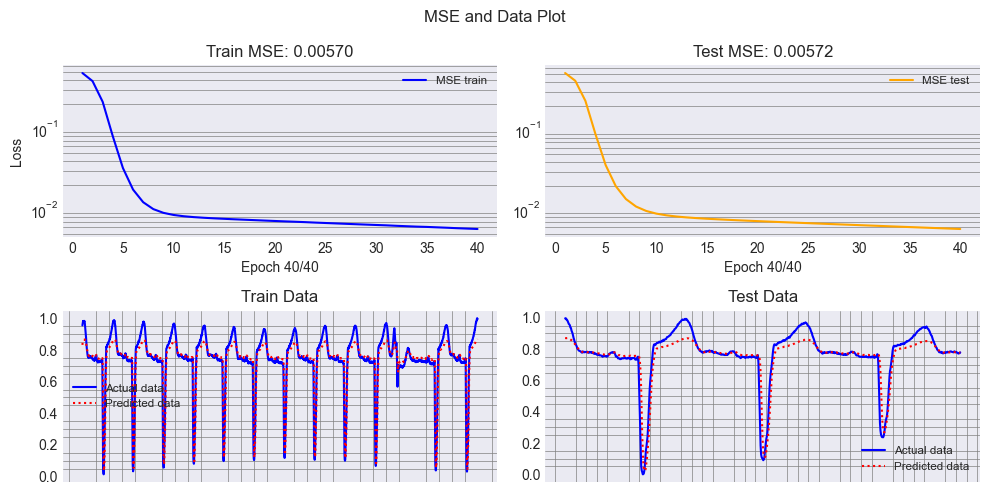

In [17]:
hidden_size = 1
my_lstm = LSTM_unit(n_feature, hidden_size, n_output, bias=True)
history = my_lstm.train(datas, epochs=40, learning_rate=1e-2, bias_learning_rate=5e-5, plot_data=True)

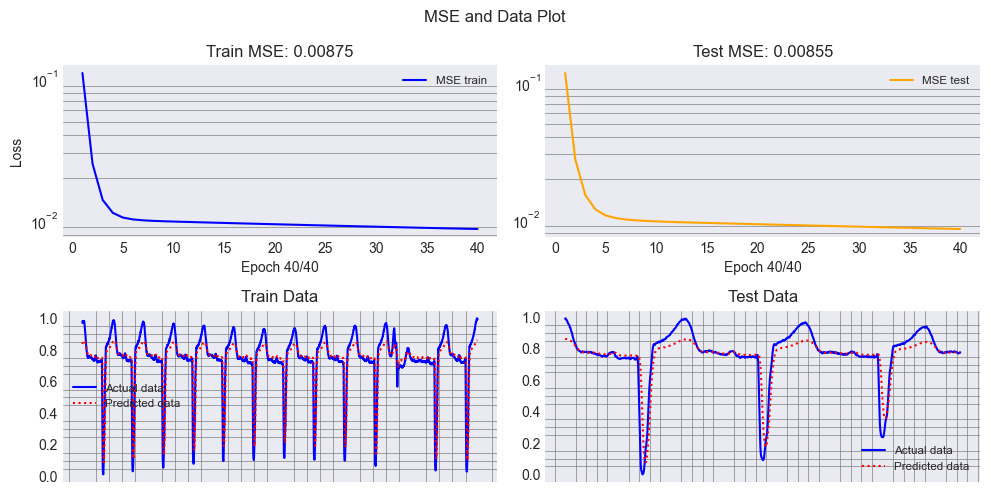

In [18]:
hidden_size2 = 1
my_lstm2 = LSTM_unit(n_feature2, hidden_size2, n_output2, bias=True)
history = my_lstm2.train(datas2, epochs=40, learning_rate=1e-2, bias_learning_rate=5e-5, plot_data=True)

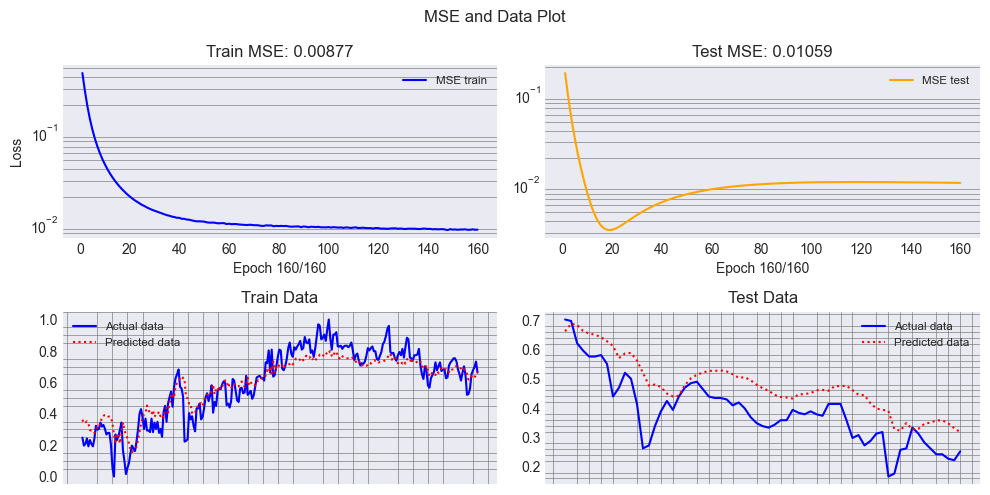

In [37]:
hidden_size3 = 2
my_lstm3 = LSTM_unit(n_feature3, hidden_size3, n_output3, bias=True)
history = my_lstm3.train(datas3, epochs=160, learning_rate=2e-2, bias_learning_rate=1e-4, plot_data=True)

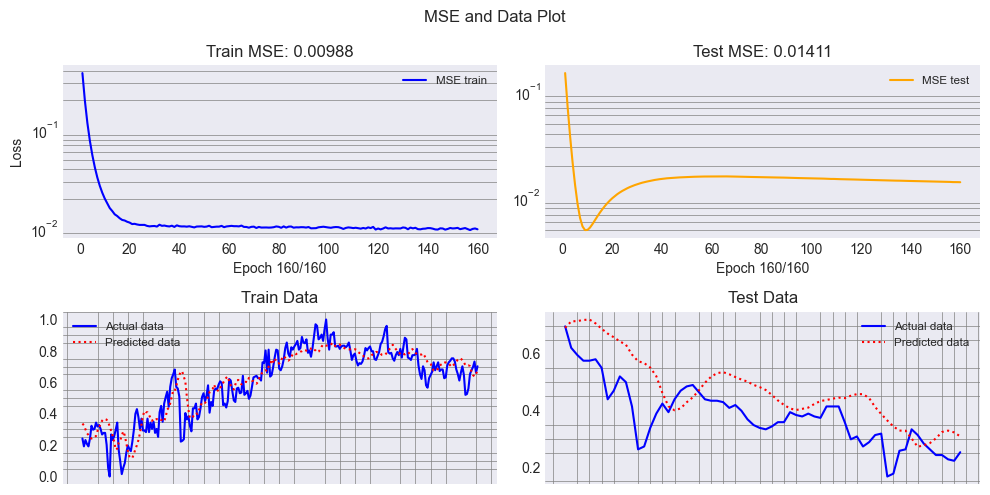

In [38]:
hidden_size4 = 2
my_lstm4 = LSTM_unit(n_feature4, hidden_size4, n_output4, bias=True)
history = my_lstm4.train(datas4, epochs=160, learning_rate=2e-2, bias_learning_rate=1e-4, plot_data=True)

## **regression plot**

In [39]:
predict_train = np.reshape([my_lstm(i) for i in train_data], (-1, n_output))
predict_test = np.reshape([my_lstm(i) for i in test_data], (-1, n_output))
predict_whole= np.reshape([my_lstm(i) for i in input_data], (-1, n_output))

In [40]:
predict_train2 = np.reshape([my_lstm2(i) for i in train_data2], (-1, n_output2))
predict_test2 = np.reshape([my_lstm2(i) for i in test_data2], (-1, n_output2))
predict_whole2 = np.reshape([my_lstm2(i) for i in input_data2], (-1, n_output2))

In [41]:
predict_train3 = np.reshape([my_lstm3(i) for i in train_data3], (-1, n_output3))
predict_test3 = np.reshape([my_lstm3(i) for i in test_data3], (-1, n_output3))
predict_whole3 = np.reshape([my_lstm3(i) for i in input_data3], (-1, n_output3))

In [42]:
predict_train4 = np.reshape([my_lstm4(i) for i in train_data4], (-1, n_output4))
predict_test4 = np.reshape([my_lstm4(i) for i in test_data4], (-1, n_output4))
predict_whole4 = np.reshape([my_lstm4(i) for i in input_data4], (-1, n_output4))

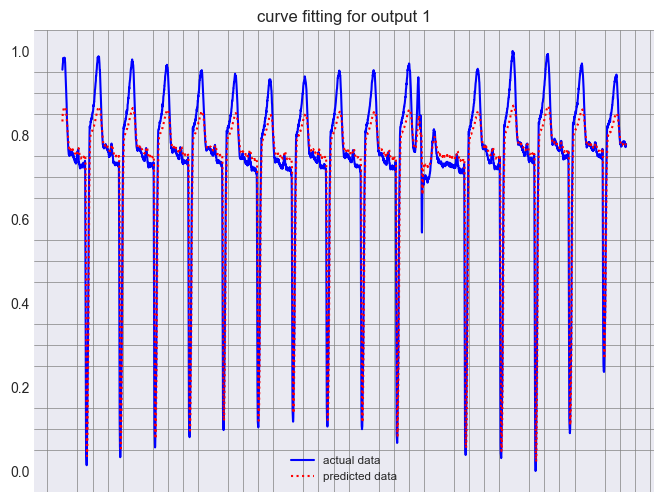

In [43]:
plot_outputs(target_data, predict_whole)

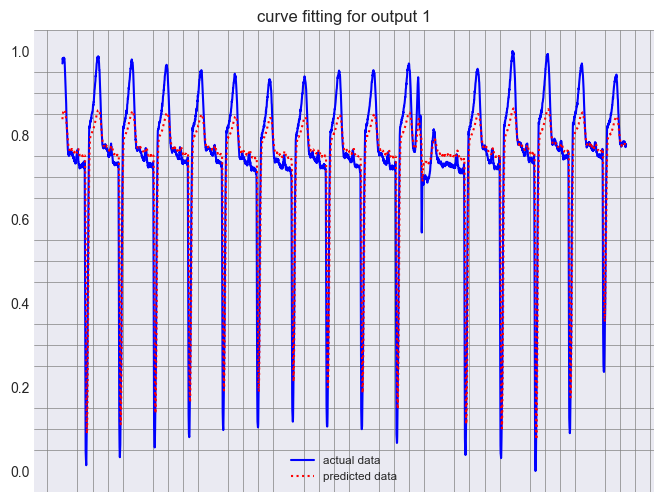

In [44]:
plot_outputs(target_data2, predict_whole2)

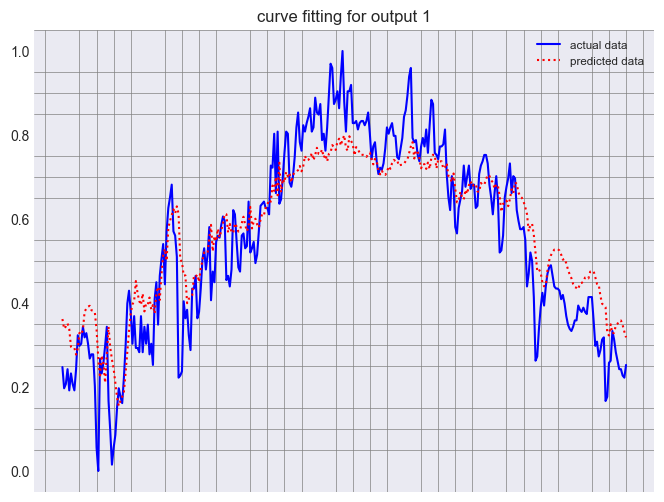

In [45]:
plot_outputs(target_data3, predict_whole3)

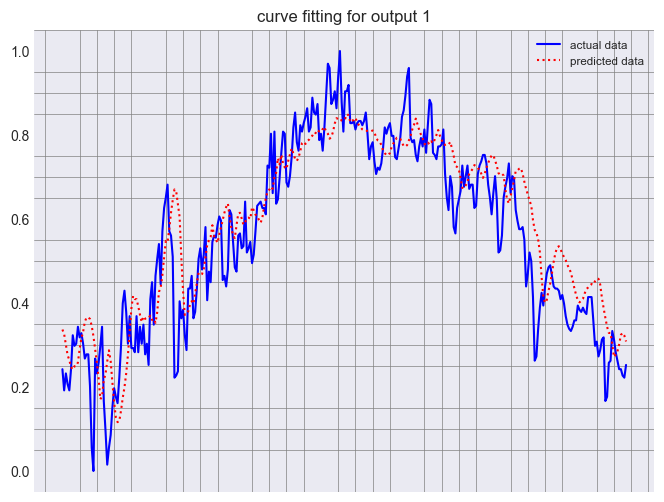

In [46]:
plot_outputs(target_data4, predict_whole4)

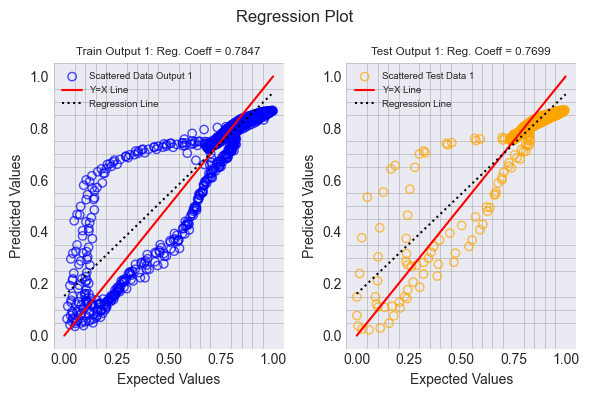

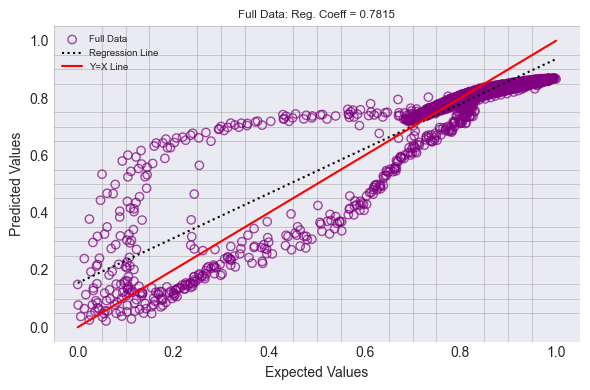

In [47]:
plot_regression(train_target, predict_train, test_target, predict_test,\
                 target_full=target_data, predict_full=predict_whole, figsize=(6, 4))

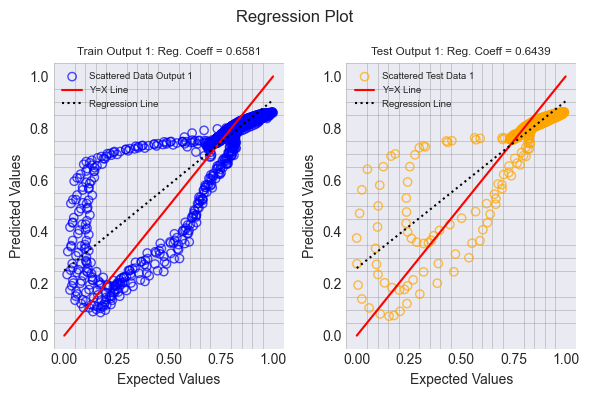

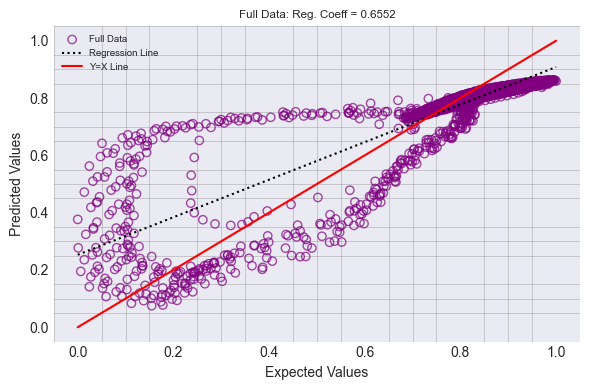

In [48]:
plot_regression(train_target2, predict_train2, test_target2, predict_test2,\
                 target_full=target_data2, predict_full=predict_whole2, figsize=(6, 4))

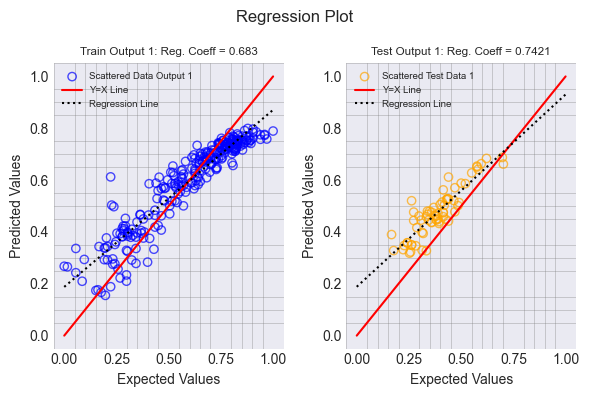

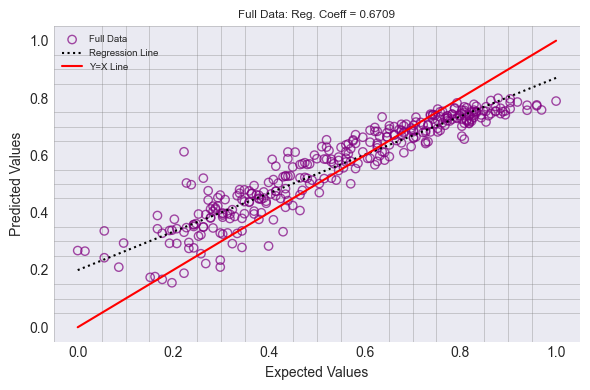

In [49]:
plot_regression(train_target3, predict_train3, test_target3, predict_test3,\
                 target_full=target_data3, predict_full=predict_whole3, figsize=(6, 4))

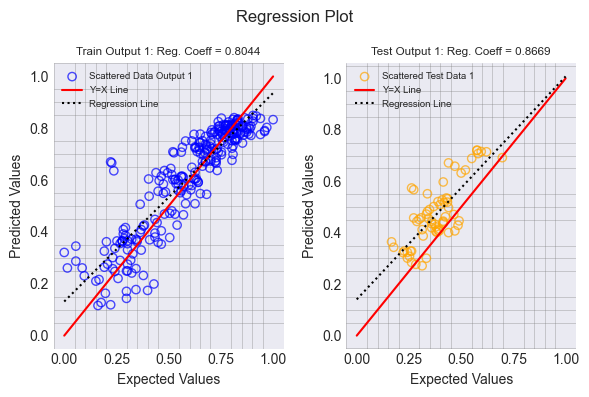

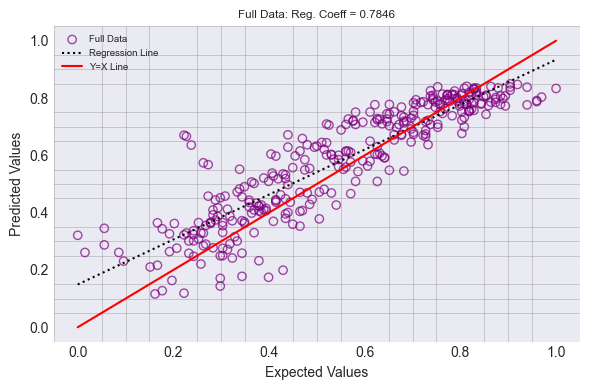

In [50]:
plot_regression(train_target4, predict_train4, test_target4, predict_test4,\
                 target_full=target_data4, predict_full=predict_whole4, figsize=(6, 4))